In [1]:
# we start by importing the Python libraries that we will be using:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy.stats as stats
import seaborn as sns
plt.style.use('ggplot')
sns.set(rc = {'figure.figsize':(15,8)})

In [2]:
# pass the dataset through Pandas and output it as a dataframe andread the first 5 rows:
df = pd.read_csv('data/kc_house_data.csv')


df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


<AxesSubplot:>

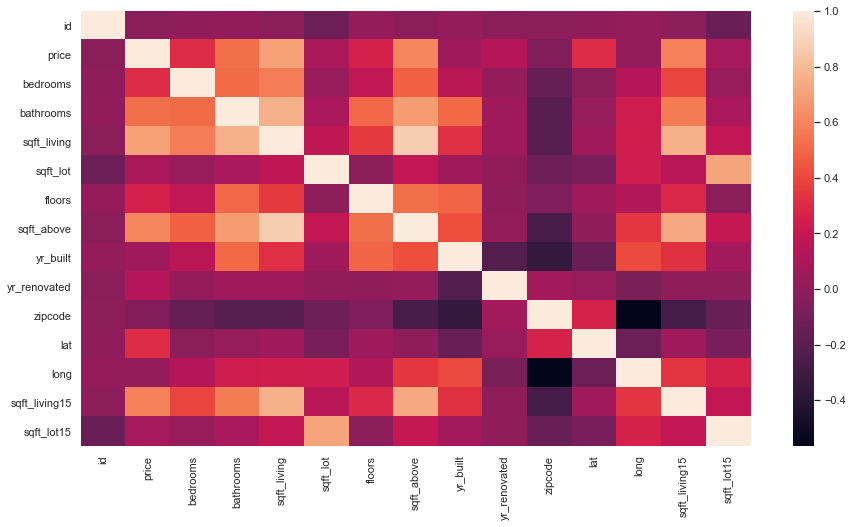

In [3]:
sns.heatmap(df.corr()) # use a heatmap to detect correlation between the columns

In [23]:
X = df.iloc[:, 3:8] # select the relevant rows
y = df.iloc[:, 2]

In [24]:
X, y # inspect our variables

(       bedrooms  bathrooms  sqft_living  sqft_lot  floors
 0             3       1.00         1180      5650     1.0
 1             3       2.25         2570      7242     2.0
 2             2       1.00          770     10000     1.0
 3             4       3.00         1960      5000     1.0
 4             3       2.00         1680      8080     1.0
 ...         ...        ...          ...       ...     ...
 21592         3       2.50         1530      1131     3.0
 21593         4       2.50         2310      5813     2.0
 21594         2       0.75         1020      1350     2.0
 21595         3       2.50         1600      2388     2.0
 21596         2       0.75         1020      1076     2.0
 
 [21597 rows x 5 columns],
 0        221900.0
 1        538000.0
 2        180000.0
 3        604000.0
 4        510000.0
            ...   
 21592    360000.0
 21593    400000.0
 21594    402101.0
 21595    400000.0
 21596    325000.0
 Name: price, Length: 21597, dtype: float64)

from sklearn.preprocessing import OneHotEncoder

onehotencoder = OneHotEncoder()
X = onehotencoder.fit_transform(X).toarray()


In [6]:
from sklearn.model_selection import train_test_split

In [7]:
# splitting data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
# fitting multiple linear regression into the training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [10]:
# predicting the test set results

y_pred = regressor.predict(X_test)
print(y_pred)

[1047910.67499353  504079.39916666  892783.21101796 ...  662992.61437897
  929376.89301466  360368.46295076]


In [11]:
#calculate coefficients
print(regressor.coef_)

[-5.97135210e+04  2.33168807e+03  3.22197737e+02 -4.61265517e-01]


In [12]:
#calculate intercept
print(regressor.intercept_)

74058.98095488676
